# Analysis 1

## Some general analysis encountered during Data Cleaning

In [24]:
%matplotlib inline

In [19]:
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [20]:
# absolute path till parent folder
abs_path = os.getcwd()
path_array = abs_path.split("/")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i   

In [22]:
# path to clean data
clean_data_path = homefolder_path + "/CleanData/CleanedDataSet/cleaned_autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

## Distribution of Vehicles based on Year of Registration

/Users/aj/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


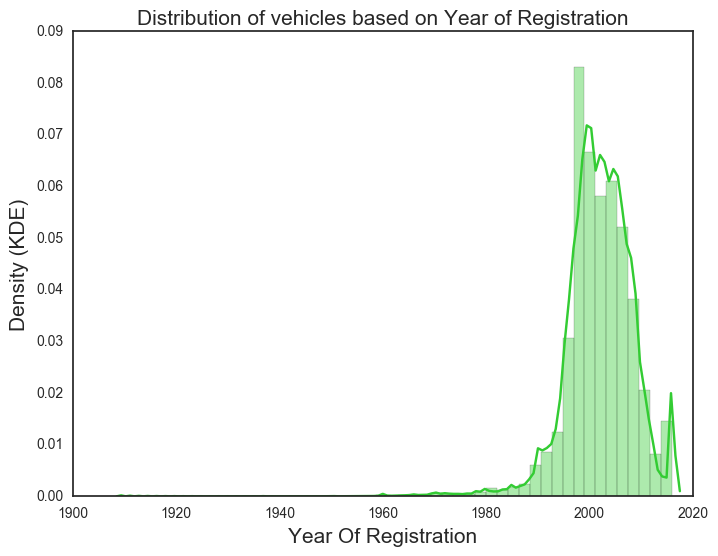

In [64]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
plt.show()

In [33]:
# saving the plot
fig.savefig(abs_path + "/Plots/vehicle-distribution.png")

## Variation of the price range by the vehicle type

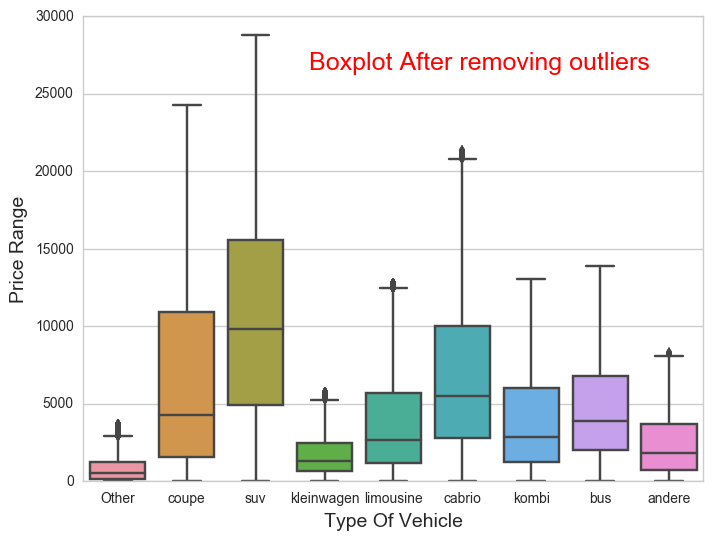

In [69]:
# Boxplot to see the distribution after outliers has been removed
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Boxplot After removing outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})
plt.show()

In [70]:
# saving the plot
fig.savefig(abs_path + "/Plots/price-vehicleType-boxplot.png")

## Total count of vehicles by type available on ebay for sale

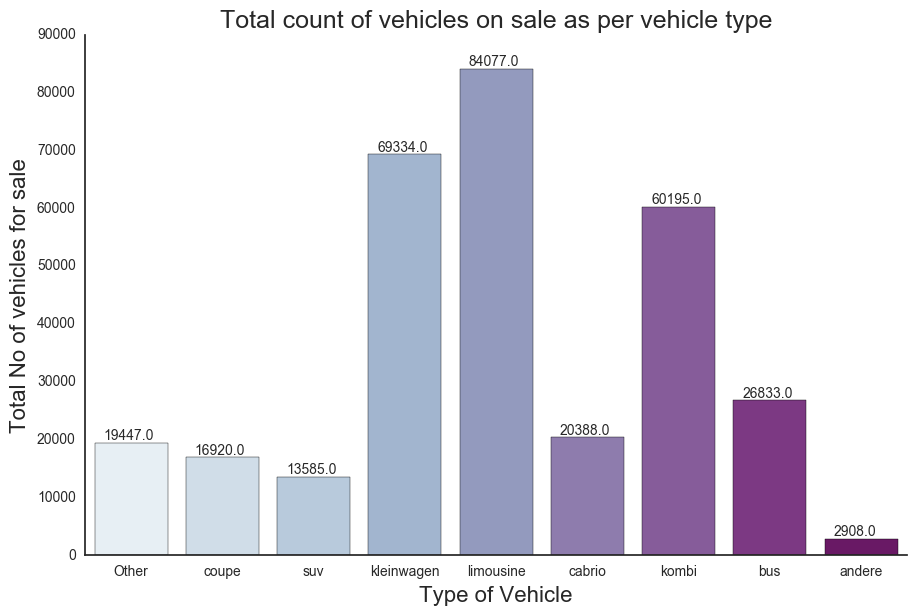

In [67]:
# Count plot to show the number of vehicles belonging to each vehicleType
sns.set_style("white")
g = sns.factorplot(x="vehicleType", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Type of Vehicle",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total No of vehicles for sale", fontdict= {'size':16})
g.ax.set_title("Total count of vehicles on sale as per vehicle type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [68]:
# saving the plot
g.savefig(abs_path + "/Plots/count-vehicleType.png")